# Assignment #2 - Classification

<font color="red"> <b> Due: Mar 5 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Srishti Tiwari </font>

# I. Introduction

This assignment is about applying Classification algorithms on classification dataset. Working on this dataset, we intend to discover the topic of Classification in Machine Learning by a step by step process. I have first analysed , processed and visualised data to get a better understanding about the same. Later, based on this analysis, I have applied algorithms such as Pocket, QDA, LDA and Linear Regression,. 

# II. Data

1. Title of Database: Adult census dataset
2. Sources:
   (a) Original owners of database (name/phone/snail address/email address)
       US Census Bureau.
   (b) Donor of database (name/phone/snail address/email address)
       Ronny Kohavi and Barry Becker, 
       Data Mining and Visualization
       Silicon Graphics.
       e-mail: ronnyk@sgi.com
   (c) Date received (databases may change over time without name change!)
       05/19/96
3. Past Usage:
   (a) Complete reference of article where it was described/used
        @inproceedings{kohavi-nbtree,
           author={Ron Kohavi},
           title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a 
                  Decision-Tree Hybrid},
           booktitle={Proceedings of the Second International Conference on
                      Knowledge Discovery and Data Mining},
           year = 1996,
           pages={to appear}}
   (b) Indication of what attribute(s) were being predicted 
       Salary greater or less than 50,000.
   (b) Indication of study's results (i.e. Is it a good domain to use?)
       Hard domain with a nice number of records.
       The following results obtained using MLC++ with default settings
       for the algorithms mentioned below.
        
           Algorithm               Error
        -- ----------------        -----
        1  C4.5                    15.54
        2  C4.5-auto               14.46
        3  C4.5 rules              14.94
        4  Voted ID3 (0.6)         15.64
        5  Voted ID3 (0.8)         16.47
        6  T2                      16.84
        7  1R                      19.54
        8  NBTree                  14.10
        9  CN2                     16.00
        10 HOODG                   14.82
        11 FSS Naive Bayes         14.05
        12 IDTM (Decision table)   14.46
        13 Naive-Bayes             16.12
        14 Nearest-neighbor (1)    21.42
        15 Nearest-neighbor (3)    20.35
        16 OC1                     15.04
        17 Pebls                   Crashed.  Unknown why (bounds WERE increased)

4. Relevant Information Paragraph:
   Extraction was done by Barry Becker from the 1994 Census database.  A set
    of reasonably clean records was extracted using the following conditions:
    ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

5. Number of Instances
   48842 instances, mix of continuous and discrete    (train=32561, test=16281)
   45222 if instances with unknown values are removed (train=30162, test=15060)
   Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

6. Number of Attributes 
   6 continuous, 8 nominal attributes.

7. Attribute Information: 

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
class: >50K, <=50K

data['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
data['income'] = np.where(data.income == '<=50K', 0, 1)
data['marital_num'] = data['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
data['race_num'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
data['sex_num'] = np.where(data.sex == 'Female', 0, 1)
data['rel_num'] = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data.head()
8. Missing Attribute Values: 

   7% have missing values.

9. Class Distribution: 

 Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
 Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)



In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [227]:
# import data
data = pd.read_csv('adult.csv')

## Data Preprocessing

In [228]:
# Check for Null Data
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [229]:
# Replace All Null Data in NaN
data = data.fillna(np.nan)

In [230]:
# Get data types
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [231]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [232]:
# Fill Missing Category Entries
data["workclass"] = data["workclass"].fillna("X")
data["occupation"] = data["occupation"].fillna("X")
data["native.country"] = data["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [233]:
# create numerical columns representing the categorical data
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [234]:
# Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']
data.shape

(32561, 15)

## Data Visualization

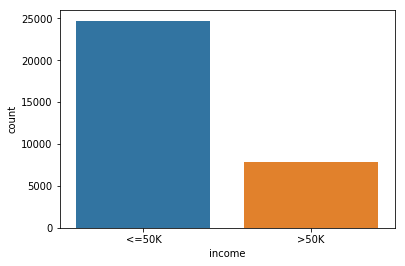

In [235]:
# Count of >50K & <=50K
sns.countplot(data['income'],label="Count")
plt.show()

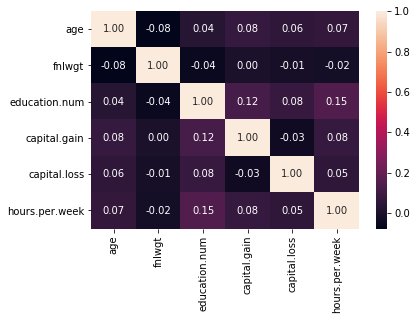

In [236]:
# Correlation matrix between numerical values
g = sns.heatmap(data[numeric_features].corr(),annot=True, fmt = ".2f")
plt.show()

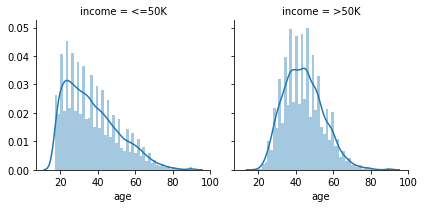

In [237]:
# Age vs Income
g = sns.FacetGrid(data, col='income')
g = g.map(sns.distplot, "age")
plt.show()


## Replacing categorical data into numerical

In [238]:
data['workclass'] = pd.factorize(data.workclass)[0]
data['income'] = pd.factorize(data.income)[0]
data['marital.status'] = pd.factorize(data['marital.status'])[0]
data['race'] = pd.factorize(data.race)[0]
data['sex'] = pd.factorize(data.sex)[0]
data['relationship'] = pd.factorize(data.relationship)[0]
data['education'] = pd.factorize(data.education)[0]
data['occupation'] = pd.factorize(data.occupation)[0]
data['native.country'] = pd.factorize(data['native.country'])[0]
#data.loc[data['fnlwgt']<=50000,'fnlwgt']=0 
#data.loc[data['fnlwgt']>50000,'fnlwgt']=1

In [239]:
data.head(100)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,0,9,0,0,0,0,0,0,4356,40,0,0
1,82,1,132870,0,9,0,1,0,0,0,0,4356,18,0,0
2,66,0,186061,1,10,0,0,1,1,0,0,4356,40,0,0
3,54,1,140359,2,4,1,2,1,0,0,0,3900,40,0,0
4,41,1,264663,1,10,2,3,2,0,0,0,3900,40,0,0
5,34,1,216864,0,9,1,4,1,0,0,0,3770,45,0,0
6,38,1,150601,3,6,2,5,1,0,1,0,3770,40,0,0
7,74,2,88638,4,16,3,3,3,0,0,0,3683,20,0,1
8,68,3,422013,0,9,1,3,0,0,0,0,3683,40,0,0
9,41,1,70037,1,10,3,6,1,0,1,0,3004,60,1,1


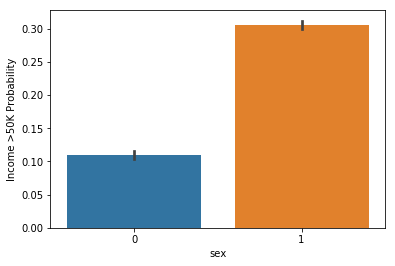

In [ ]:
# Gender vs Income
g = sns.barplot(x="sex",y="income",data=data)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/home/srishti/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/srishti/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


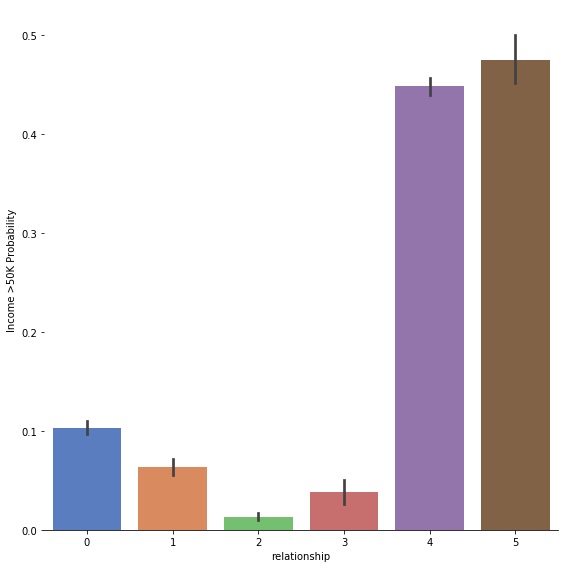

In [ ]:
# Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=data,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

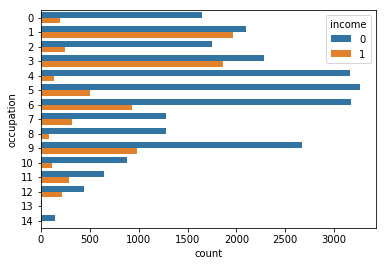

In [ ]:
sns.countplot(y='occupation', hue='income', data=data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9b18636a0>,
      dtype=object)

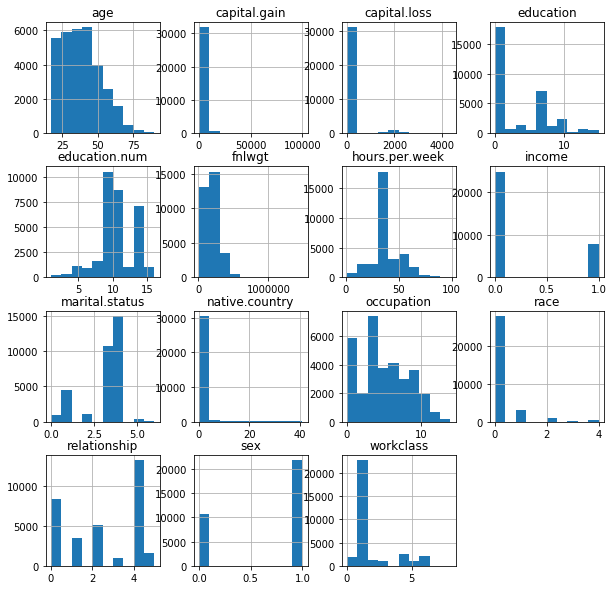

In [ ]:
data.select_dtypes(include=['int']).hist(figsize=(10,10))

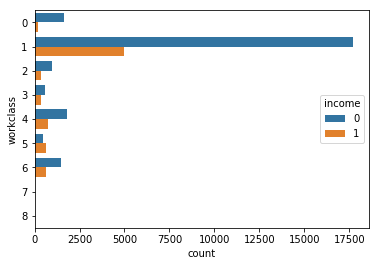

In [ ]:
sns.countplot(y='workclass', hue='income', data = data)

# III. Method

The superclass, Classifier, was used to aid in the implementation of all four classification algorithms (pocket,QDA,LDA, and linear regression). To help account for biased factor, a add_ones method is included.

__Pocket Classifier__

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

 - Takes in data (X) to train the model. This data is then used to create a weight matrix (w) that will be used in a dot product along with input data. The result will then go through a step function to try and figure out which classification the data best fits into.
 - The primary issue with this classifier is that it can only take binary data in the form of 1 or -1. This limits the data classifications.
 - The use method returns a list of the predicted outputs (Y) that is created by calculating the dot product of X and w and adding bias.
    
__QDA Classifier__

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$


 - Requires no alpha or a number for limited iterations. QDA only requires training data with input matrix (X) and the target value matrix (T)
 - No conversion is needed due to how QDA is capable of workibng on multiple classes
 - The mu, sigma, and prior are found by grouping data into a list of lists and running the calculations on each sublist.
    
__LDA Classifier__

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

 - Very similar to QDA classifier since it requires the same data matrices X and T, while also not requiring alpha and limited iterations
 - However, LDA is computationally cheaper due to not having to manage covariance matrix
 - Similarly to QDA, no conversion is required
    
__Linear Regression Classifier__

$$
\wv \leftarrow \wv + \alpha \Xm^\top \Big(  \Tm - g(\Xm)\Big).
$$

 - Similar to the Pocket algorithm since it requires alpha and a limited number of iterations
    Primary difference between LR and Pocket algorithm is that instead of using a step function, as the pocket algorithm does, linear regression uses a softmax function
    
__Evaluation Methods__

- **Accuracy** : It is the percentage of correct classifications.

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

- **Precision**: The accuracy of positive predictions. We can read this as *the ratio that my positive prediction is correct*.

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Recall** (Sensitivity or True Positive Rate): This measure give you how the model's prediction covers the positive class. 

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Specificity** (True Negative Rate): Considering imblance or difference in class, we consider TNR as well. 

$$
\text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

- **F1 Score** : The harmonic mean of precision and recall. 

$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

- **MCC** (Matthews Correlation Coefficient): MCC uses all the counts in confusion matrix for the metric. 

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$

- **ROC** : The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity). 

- **AUC** : AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve.

- **Confusion Matrix** : Here, each row represents the predictions from model and column represents the actual classes.

| - | + 
 --|--|--
 - | True Negative (TN) | False Negative (FN)
 + | False Positive (FP) | True Positive (TP)




### EXPLANATION OF CODES

1) Pocket algorithm

The pocket algorithm class contains two attributes - alpha(the learning rate) and pocket itself- wp. Along with that,it contains train and use method. 

Train - This method is used for calculating the weights. We iterate over the input samples and update the weight index using the weight formula. The entire weight matrix is then calculated. At each iteration, we use compare method to check if the current weight vector is better than the previous or not. We then store the best weight in wp.

Use - Once the train function is called, the weights can be applied to classify the data. We take the dot product of wp and input data for applying the weights.


2) QDA

This class inherites the Classifier base class and overrides the train and use methods that it inherits. 

Train - In this, we determine the number of classes, find the priori probabilities using the Bayes theorem and then calculate the mean and standard deviation(sigma) for each class. The value of mean and sigma are then copied into the mean and sigma attributes of the QDA class.

Use - After the train function runs, the mean, sigma and prior probabilities have been calculated. This function then uses these values to evaluate the classification of the sample. 

3) LDA

LDA inherits the Classifier base class and overrides the train and use abstract methods. It also has two attributes prior and mu.

Train - It calculates mu1, mu2, sigma, prior1 and prior2 after normalizing X. This is done by determining possible unique classes and pushing them in a list. Then iterating over each class from the list and calculating mean and probability for each of these classes and pushing them into the attributes of the class that represent each of these.

Use - This method uses mu1, mu2, sigma and prior1 and prior2 values for determining vector d using the logarithm based formula used in LDA.

4) Logistic Regression

It overrides the train and use the method. This class also has softmax and g method as helper methods.

Train - this method updates the weights iteratively after calculating the derivative of the softmax transformation. For calculating the softmax function, it uses the function softmax and uses the function g for calculating the dot product of the weight matrix and input matrix.

Use - The use method will calculate the dot product of the weight matrix and the input samples to give the output. This output is provided by using the g function which is calculating the dot product of the current weight matrix and input matrix.

### A. Super Classs Definition

In [ ]:
import numpy as np
import abc
from abc import ABC, abstractmethod
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X -self.meanX)/ self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    
    def partition_data(self,X,T,ratio=[0.8,0.2]):
        assert(np.sum(ratio) == 1)
    
        idxs = np.random.permutation(X.index)
        N = X.shape[0]
    
        X_ = []
        T_ = []
    
        i = 0
        for j, r in enumerate(ratio):
            rows = int(round(N * r))
            if j == len(ratio) -1:
                X_.append(X.iloc[i:, :])
                T_.append(T.iloc[i:, :])        
            else:
                X_.append(X.iloc[i:i+rows, :])
                T_.append(T.iloc[i:i+rows, :])
        
            i+= rows
    
        return X_, T_
    
    
    def confusion_matrix(self,Y,T):
        """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cm DataFrame
             confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and wrong target length")
    
        classes = np.unique(T)
        n_classes = len(classes)
    
        cm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
        Tidx = [T == c for c in classes]
        for c in classes:
            pred_idx = Y == c
            cm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]    
        return cm
    
    def precision(self,cm):
        return cm[1][1]/(cm.sum(axis=1)[1])
    
    def recall(self,cm):
        return cm[1][1]/(cm.sum(axis=0)[1])
    
    def specificity(self,cm):
        return cm[-1][-1]/(cm.sum(axis=0)[-1])
    
    def f1(self,cm):
        return 2 * ((self.precision(cm) * self.recall(cm)) / (self.precision(cm) + self.recall(cm)))
    
    def roc(self,Y,T):
        fpr, tpr, thresholds = metrics.roc_curve(Y,T, pos_label=None)
        plt.plot(fpr, tpr,linewidth=2, label= None)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.show()
    
    def roc_auc(self,Y,T):
        return roc_auc_score(Y,T)
    
    def getMetrics(self,Y,T):
        cm = self.confusion_matrix(Y,T)
        print(pd.DataFrame([['TN','FN'],['FP','TP']],index=["-","+"],columns=["-","+"]))
        print(cm)
        result = [self.precision(cm),self.recall(cm),self.specificity(cm),self.f1(cm),self.roc_auc(Y,T)]
        print(pd.DataFrame(result,index=["Precision","Recall","Specificity","F1 Score","ROC_AUC"],columns=["Result"]))
        self.roc(Y,T)
        return result
    
    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm



In [ ]:
# PocketAlgorithm Class
from copy import deepcopy as copy

class PocketAlgorithm(Classifier): 
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
        
    # return 1 if w is better -1 if wp is better
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
            
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
        
    # train PocketAlgorithm model and store the best weights in w_pocket
    def train(self, X, T):
        X = self.normalize(X)
        maxiter = 10
        N = X.shape[0]
        w = np.zeros(X.shape[1])
        self.wp = copy(w)

        for i in range(maxiter):
    
            converged = True
            permutedRange = np.random.permutation(N) ;
            for k in permutedRange: 
                y = w @ X[k]
                if np.sign(y) != np.sign(T[k]):
                    w += self.alpha * T[k] * X[k]
                    converged = False                
                    if self.compare(X, T, w, self.wp) > 0: 
                        self.wp[:] = w[:]
    
            if converged:
                 print("converged at ", i)
                 break

            print("End of training: ", i)
        
    
    # apply the learned model to data X
    def use(self, X):
        standardizedX = (X-self.meanX)/self.stdX
        return standardizedX @ self.wp

In [ ]:
from sklearn.model_selection import train_test_split

for i in [0.1,0.01,0.001]:
    pocketAlgorithm = PocketAlgorithm(i)
    X = data.iloc[:,:-1].values
    T = data.loc[:,'income'].values ;
    T = np.where(T == 0,-1, 1)
    X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.7, random_state=42)


    pd.set_option('display.max_rows', 500)

    pocketAlgorithm.train(X_train[:400],T_train[:400])
    Y = pocketAlgorithm.use(X_test[:100])
    plt.plot(np.sort(Y,0))
    plt.plot(np.sort(T_test[:100],0))

In [ ]:
Y = np.where(Y > 0,1,-1)
result = pocketAlgorithm.getMetrics(Y, np.squeeze(np.asarray(T_test[:100])))

### QDA


In [ ]:
# QDA Class
from copy import deepcopy as copy
class QDA(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)
        
    def train(self, X, T):
        self.prior = []
        self.mu =[]
        self.sigma = []

        X = self.normalize(X)
        
        #compute the values of priori probability, mean and sigma
        Total = X.shape[0]
        self.N = np.unique(T).shape[0]
        for i in range(self.N):
            self.prior.append(copy((T == np.unique(T[i])).sum()/Total))
            contains = np.in1d(T, np.unique(T[i]))
            if contains.any():
                mu1 = X[contains].mean(0)
                self.mu.append(copy(mu1))
                sigma1 = np.cov(X[contains].T)
                self.sigma.append(copy(sigma1))
        pass
              
    def use(self, X):
        self.d =[]
        Xs = (X - self.meanX)/self.stdX
        for j in range(self.N):
            #computing the probabilities of the datapoints in each class
            D = Xs.shape[1]
            detSigma = self.sigma[j] if D == 1 else np.log(np.linalg.det(self.sigma[j]))
            diff = Xs - self.mu[j].T
            sigmaI = 1.0/self.sigma[j] if D == 1 else np.linalg.inv(self.sigma[j])
            self.d.append(-0.5 * detSigma - 0.5 * np.sum(np.dot(diff,sigmaI) * diff, axis=1) + np.log(self.prior[j]))
        return self.d
        pass

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

qda = QDA()
qda.train(X_train[:400],T_train[:400])

d = qda.use(X_test[:100])
D = np.argmax(d,axis=0)

xs, ys = np.meshgrid(np.linspace(-3,6,10), np.linspace(-3,7, 10))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d[0].reshape(xs.shape),0), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d[1].reshape(xs.shape),0), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(d[0]-d[1],0) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(d[0].reshape(xs.shape),0) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[0]))
prob2 = np.exp( np.sort(d[1].reshape(xs.shape),0) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

In [ ]:

qda.confusion_matrix(D, T_test[:100].flatten())

### D. LDA

In [ ]:
# LDA Class
from copy import deepcopy as copy
class LDA(Classifier): 
    """ 
        LDA class 
        
    """
    def __init__(self):
        Classifier.__init__(self)
        
        
    
    def train(self, X, T):
        self.prior = []
        self.mu =[]

        X = self.normalize(X)
        
        Total = X.shape[0]
        self.N = np.unique(T).shape[0]
        self.sigma = np.cov(X.T)
        for i in range(self.N):
            self.prior.append(copy((T == np.unique(T[i])).sum()/Total))
            contains = np.in1d(T, np.unique(T[i]))
            if contains.any():
                mu1 = X[contains].mean(0)
                self.mu.append(copy(mu1))
        pass

    
    def use(self, X):
        self.d =[]
        Xs = (X - self.meanX)/self.stdX
        for j in range(self.N):
            D = Xs.shape[1]
            detSigma = self.sigma if D == 1 else np.log(np.linalg.det(self.sigma))
            diff = Xs - self.mu[j].T
            sigmaI = 1.0/self.sigma if D == 1 else np.linalg.inv(self.sigma)
            self.d.append(np.sum(np.dot(X, sigmaI)*self.mu[j] - 0.5 * np.dot(self.mu[j],sigmaI)*self.mu[j] + np.log(self.prior[j]), axis =1))
        return self.d
        pass

In [ ]:
from sklearn.metrics import roc_auc_score
lda = LDA()
lda.train(X_train[:400],T_train[:400])

d= lda.use(X_test[:100])
D = np.argmax(d,axis=0)
 
#plt.plot(d[0])
#plt.plot(d[1])

xs, ys = np.meshgrid(np.linspace(-3,6, 10), np.linspace(-3,7, 10))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *d[0].reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *d[1].reshape(xs.shape)), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(d[0]-d[1]) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( np.sort(d[0].reshape(xs.shape)) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[0]))
prob2 = np.exp( np.sort(d[1].reshape(xs.shape)) - 0.5*X_train.shape[1]*np.log(2*np.pi) - np.log(qda.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")

In [ ]:
lda.confusion_matrix(D, np.squeeze(np.asarray(T_test[:100])))

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
slda = LinearDiscriminantAnalysis(n_components=2)
slda.fit(X_train, T_train)
dSLda = slda.predict_proba(X_test[:400])
sLD2 = np.argmax(np.array(dSLda),axis=1)
sLD2=np.where(sLD2==0,-1,1)
serrLda = (sLD2==T_test[:400])
print("Count of wrong Classified data",np.size(serrLda) - np.count_nonzero(serrLda))

### E. Logistic Regression

In [ ]:
from copy import deepcopy as copy
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)

        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
                ys = self.g(X,self.w)
                self.w += self.alpha * X.T @ (T - ys)                
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

In [ ]:
lr = LogisticRegression(0.1)
lr.train(X_train[:100],T_train[:100])
Y = lr.use(X_test[:100])

In [ ]:
Yl = np.argmax(Y, 1)
Tl=np.where(T_test==-1,0,1)

plt.plot(np.sort(T_test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr1 = LogisticRegression()
lr1.fit(X_train[:100],T_train[:100])
dLra = lr1.predict_proba(X_test[:100])
# print(lr1.score(X_test[:100],T_test[:100]))
Yl = np.argmax(dLra, 1)
Tl=np.where(T_test==-1,0,1)
plt.plot(np.sort(T_test[:100],0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")

In [ ]:
result = lr.getMetrics(Yl, np.squeeze(np.asarray(T_test[:100])))

In [ ]:
# the boundary

x = np.linspace(-3, 6, 10)
y = np.linspace(-3, 7, 10)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))

X_1 = lr.add_ones(X_test[:625])
Y = lr.g(X_1, lr.w)
zs = np.argmax(Y, 1)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(Yl.reshape(xs.shape)))
plt.title("Decision Boundary")


# IV. Experiments


### DISCUSSION ABOUT EVALUATION METRICES

I have done ROC evaluation to compute the efficiency of various algorithms. Accuracy can be a good measure but it does not take into consideration various other factors which are taken into ROC.


### DISCUSSION ABOUT TRAIN AND TEST ACCURACIES

Accuracy of Pocket Algorithm is more on the test dataset than the train dataset.

As we can see in the case of Logistic Regression too, accuracy of test datset was 87% while it was 85% in case of train dataset.

# Conclusions

1. The adult census dataset is better classified by Logistic Regression and Pocket Algorithm. 

2. Logistic Regression ROC: In case of Logistic Regression Accuracy of Logistic Regression implemented by us is greater than sklearn.Precision of Logistic Regression:  85.0 

3. The QDA and LDA algorithms do not show appropriate confusion matrix maybe because train data and test data do not contain distributed data. Also, They are not good for binary classification. 

4. Difficulties I faced:
The QDA and LDA method were hard to understand because of the complicated mathematical equations and hence seemed difficult at first to implement in a program. But going through the class notes and some internet help I was able to implement them. As there was very less theoretical explanation given, it often becomes difficult to interpret the results that we obtain.



# References

1. https://en.wikipedia.org
2. https://seaborn.pydata.org/tutorial/categorical.html
3. https://python-graph-gallery.com/seaborn/
4. http://www.scipy-lectures.org/intro/matplotlib/index.html
5. https://www.kaggle.com/uciml/adult-census-income
6. https://webpages.uncc.edu/mlee173/teach/itcs6156/index.html
